# Count Circles

## Description

Count the number of circles in the following image


## Group ID

Identify your group here, including the number and name of each group's member

In [1]:
import cv2
# to install cv2 use: pip install opencv-python
import matplotlib.pyplot as plt
import numpy as np
import math

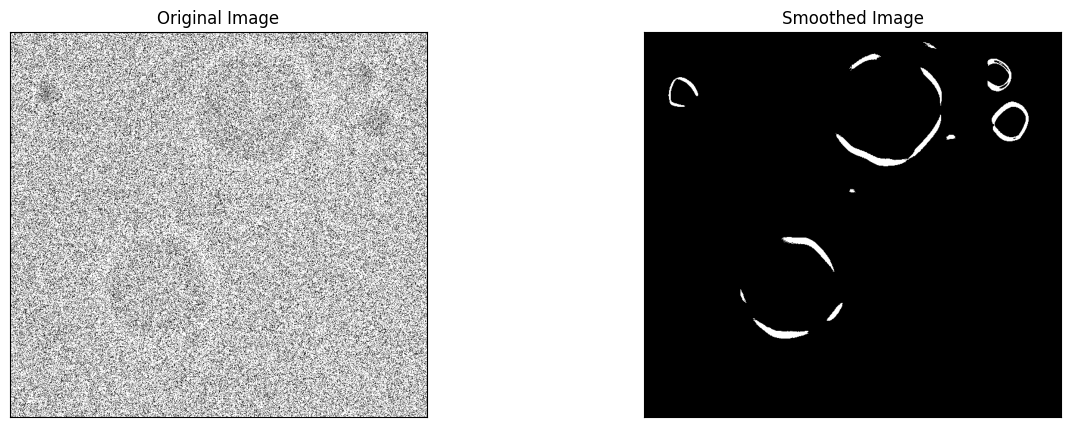

In [2]:
fname = 'Circles-noisy.png'
img_original = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
img = img_original.copy()

m1 = 7
m2 = 7
img = cv2.medianBlur(img,m1,0)
img = cv2.GaussianBlur(img,(m2,m2),0)
img = cv2.fastNlMeansDenoising(img,None,15,27,45)
img = cv2.fastNlMeansDenoising(img,None,15,27,45)
img_contrast = cv2.equalizeHist(img)
img = cv2.fastNlMeansDenoising(img_contrast,None,15,27,20)
img_contrast = cv2.equalizeHist(img)
img = cv2.fastNlMeansDenoising(img_contrast,None,15,27,20)

# # Low Pass Filter

# correlate
def correlate (kernel, image):
    W = image.shape[0]
    H = image.shape[1]
    out =np.zeros((W,H))
    a = kernel.shape[0]%2
    b = kernel.shape[1]%2
    #print (a,b)
    for y in range(b,H-b): 
        for x in range(a,W-a): 
            for s in range (-a,a+1):
                for t in range (-b, b+1):
                    out[x,y] += (kernel[s,t]*image[x+s,y+t])
    return out


def rescale (image):
    image = np.absolute(image)
    mymin=np.amin(image)
    mymax=np.amax(image)
    W = image.shape[0]
    H = image.shape[1]
    for y in range(H): 
        for x in range(W): 
            image[x,y] = (image[x,y]-mymin)*256/(mymax-mymin)
    return image

# Laplace = np.array([[-1,-1,-1], 
#                     [-1, 8, -1],
#                     [-1,-1,-1]], dtype=float)

# dImg = correlate (Laplace, img)
# dImg = rescale (dImg)
# img = np.uint8(dImg)



# Sobel Gradient Operators
Sobel_y = np.array([[-1,0,1], 
                    [-2, 0, 2],
                    [-1,0,1]], dtype=float)

Sobel_x = np.array([[-2,-4,-2],
                    [0, 0, 0],
                    [2,4,2]], dtype=float)

gx = correlate(Sobel_x, img)
gx = np.absolute(gx)
gy = correlate(Sobel_y, img)
gy = np.absolute(gy)

grad = np.sqrt(np.square(gx) + np.square(gy))
img = np.uint8(grad)
img_contrast = cv2.equalizeHist(img)
img = img_contrast.copy()

ret, img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)


fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([]), plt.yticks([])
plt.show()

## Hough Transform

Circles detected: 2


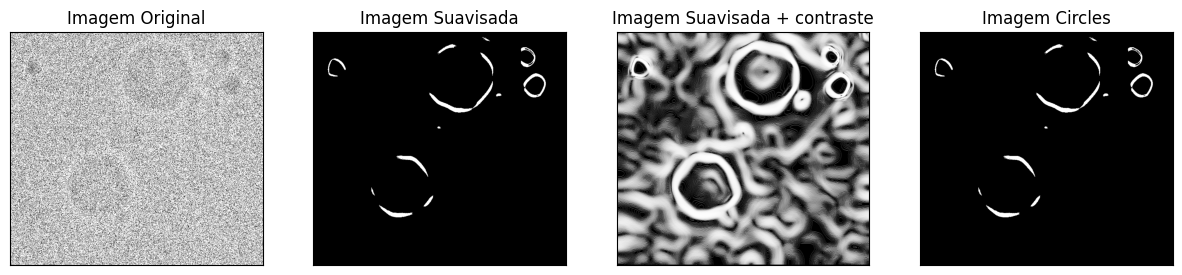

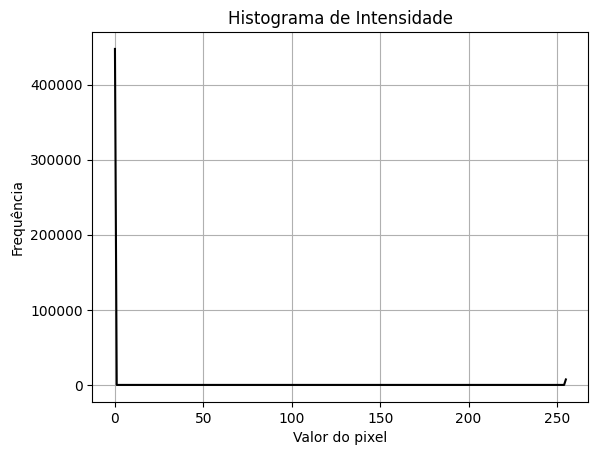

In [3]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

threshold_value = 18
ret, img_bin = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

num_circles = 0
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                               param1=75, param2=25,
                               minRadius=1, maxRadius=150)

img_circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        num_circles += 1
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_circles, center, radius, (255, 0, 0), 3)

print('Circles detected: ' + str(num_circles))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 2)
plt.imshow(img, cmap='gray')
plt.title('Imagem Suavisada')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 3)
plt.imshow(img_contrast, cmap='gray')
plt.title('Imagem Suavisada + contraste')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 4)
plt.imshow(img, cmap='gray')
plt.title('Imagem Circles')
plt.xticks([]), plt.yticks([])
plt.show()

plt.plot(histogram, color='black')
plt.xlabel('Valor do pixel')
plt.ylabel('Frequência')
plt.title('Histograma de Intensidade')
plt.grid(True)
plt.show()

## Fundamental Edge Detection

Circles detected: 12


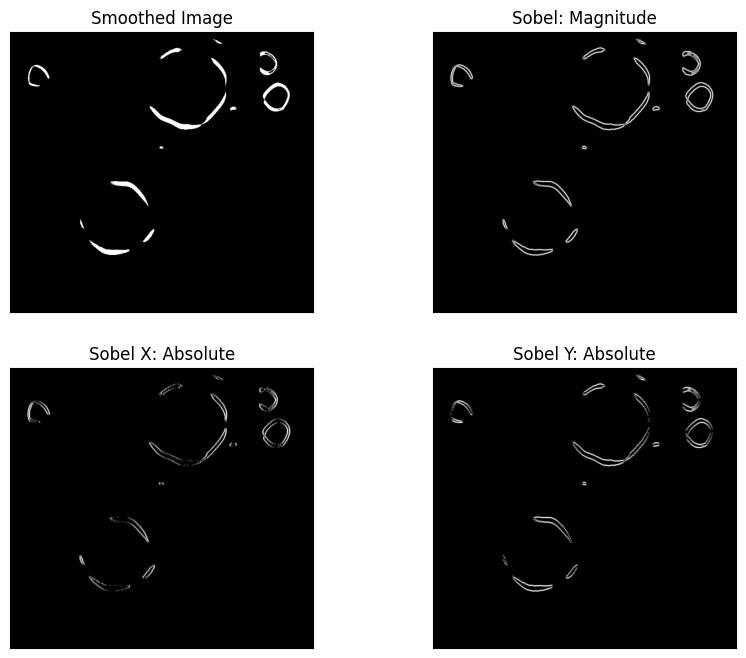

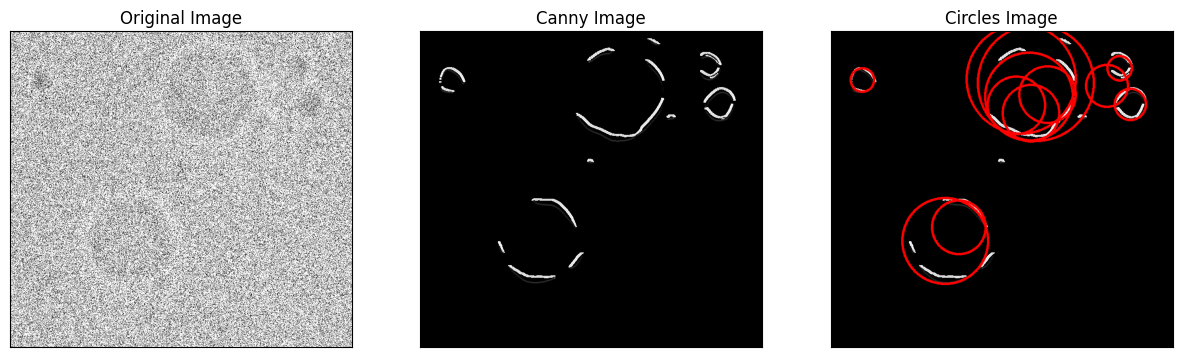

In [4]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

sobel_mag = np.sqrt(np.power(sobelx,2)+np.power(sobely,2))

fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Smoothed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobel_mag,cmap = 'gray')
plt.title('Sobel: Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(np.abs(sobelx),cmap = 'gray')
plt.title('Sobel X: Absolute'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(np.abs(sobely),cmap = 'gray')
plt.title('Sobel Y: Absolute'), plt.xticks([]), plt.yticks([])

img = np.uint8(sobely)

threshold_value = 18
ret, img_bin = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

num_circles = 0
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                               param1=75, param2=25,
                               minRadius=1, maxRadius=150)

img_circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        num_circles += 1
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_circles, center, radius, (255, 0, 0), 3)

print('Circles detected: ' + str(num_circles))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Canny Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(img_circles, cmap='gray')
plt.title('Circles Image')
plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Sobel : Magnitude Thresholded'), ([], []), ([], []))

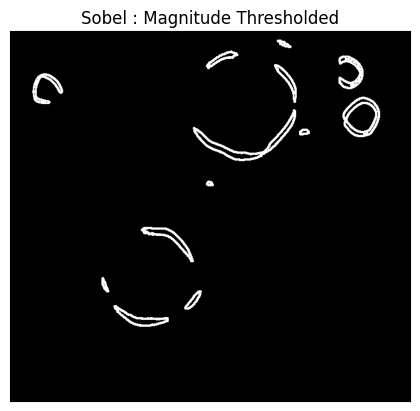

In [75]:
# Thresholding the gradient
ret,thresh1 = cv2.threshold(sobel_mag,755,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap = 'gray')
plt.title('Sobel : Magnitude Thresholded'), plt.xticks([]), plt.yticks([])

## Canny Algorithm

(Text(0.5, 1.0, 'Canny'), ([], []), ([], []))

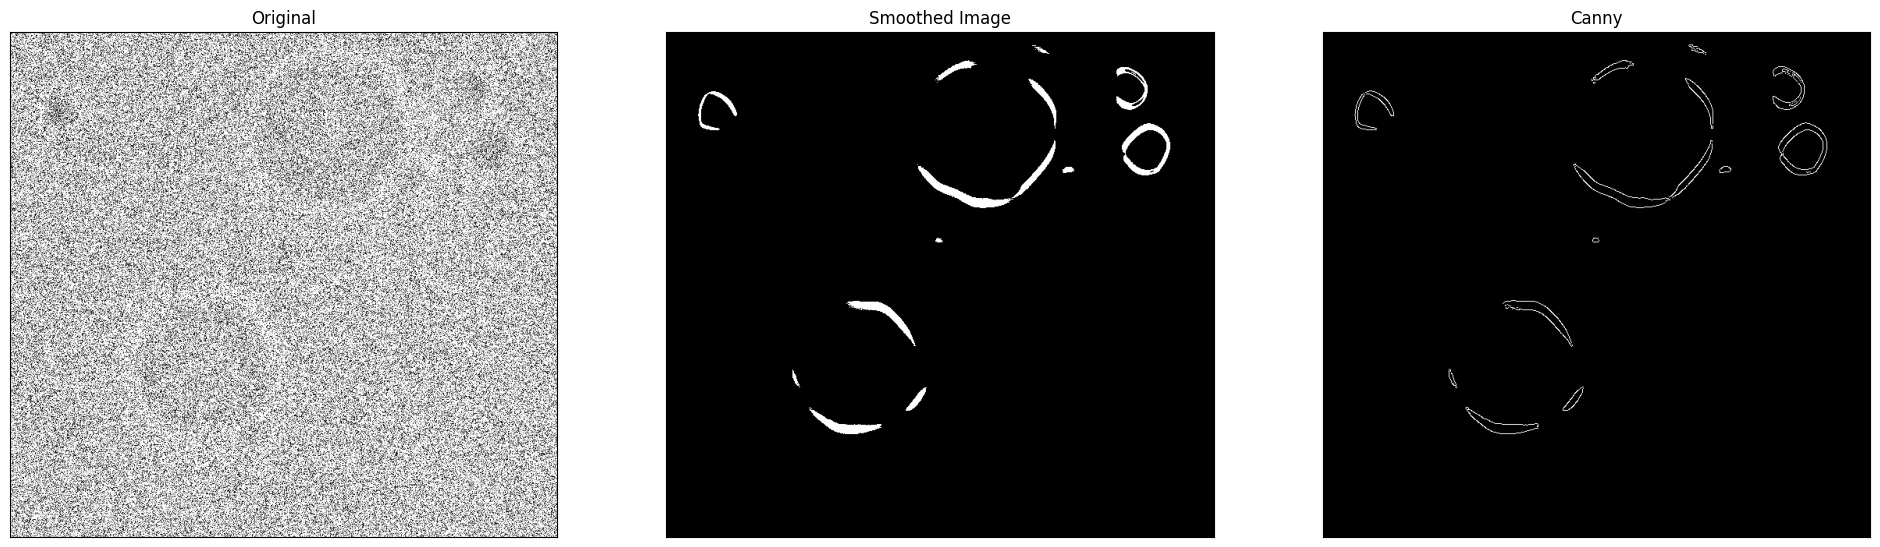

In [78]:
edges = cv2.Canny(img,200,200)
cannyImg = edges.copy()

fig = plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img_original,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img,cmap = 'gray')
plt.title('Smoothed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

## Hough Transform

(Text(0.5, 1.0, 'Hough: detected lines'), ([], []), ([], []))

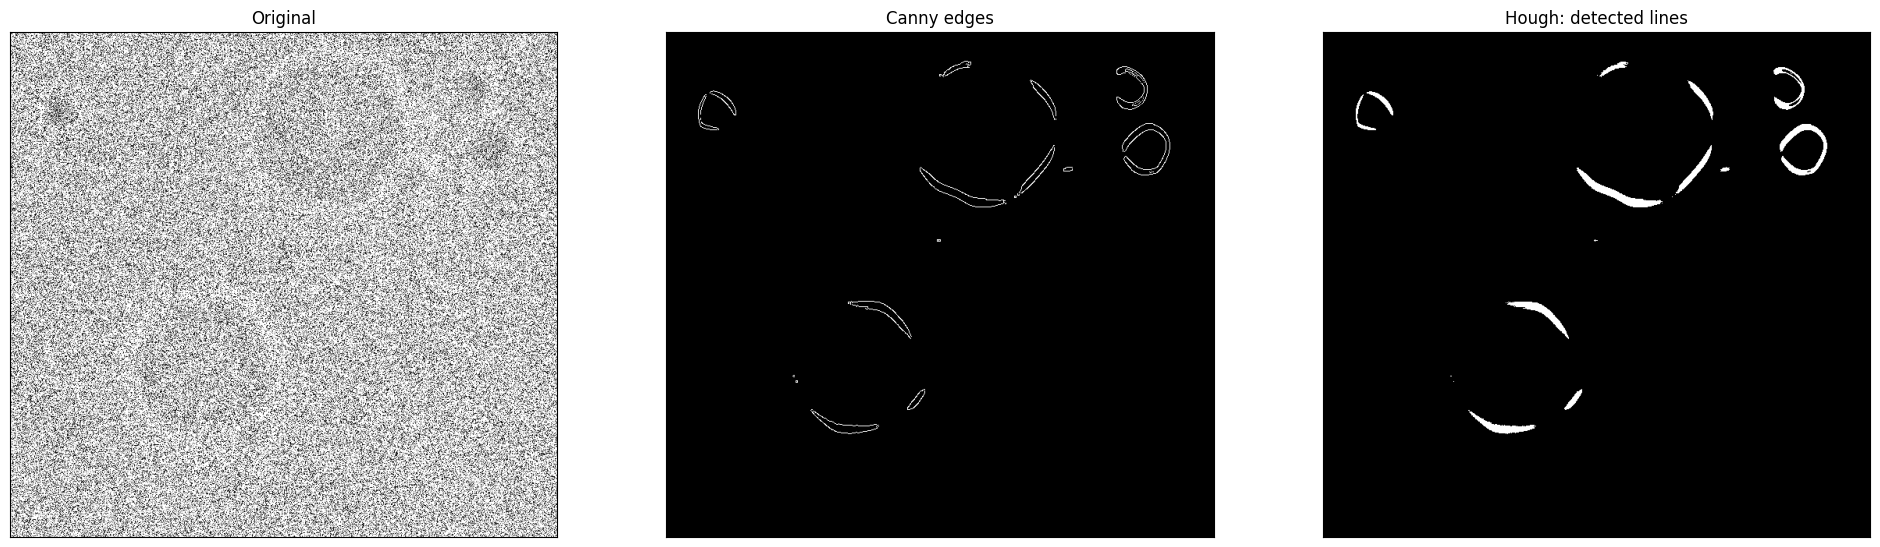

In [60]:
# Draw the lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
img_dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img_dst, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
        
fig = plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img_original,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges,cmap = 'gray')
plt.title('Canny edges'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img_dst,cmap = 'gray')
plt.title('Hough: detected lines'), plt.xticks([]), plt.yticks([])

## Thresholding

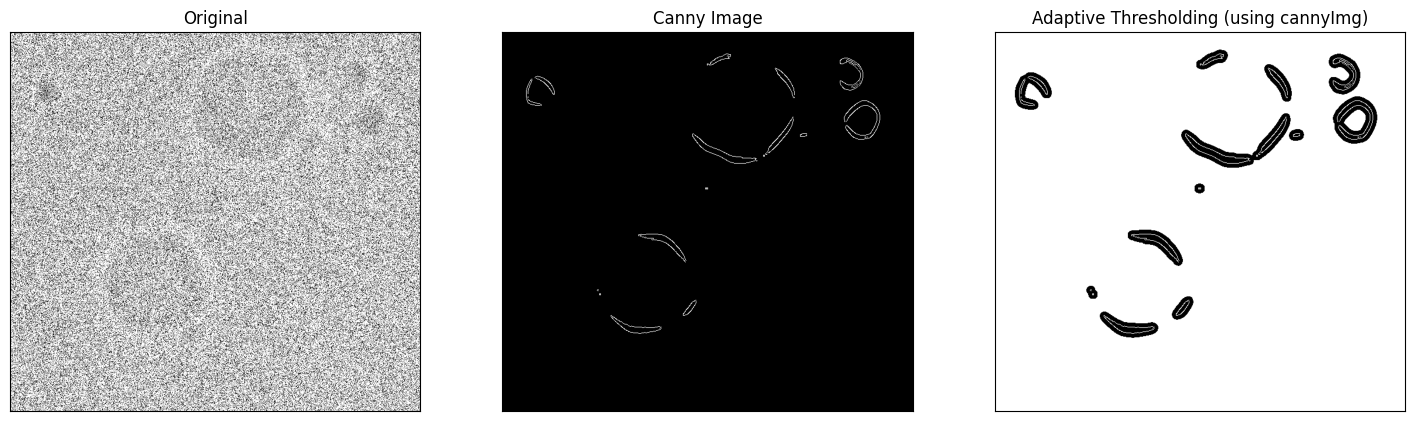

In [61]:
img = cannyImg

# Global
ret, Gthres = cv2.threshold(img,50,255,cv2.THRESH_BINARY)

# Otsu thresholding
ret, Othres = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive Thresholdinh
Athres = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,15,1)

fig = plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(img_original, cmap='gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(cannyImg, cmap='gray')
plt.title('Canny Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(Athres, cmap='gray')
plt.title('Adaptive Thresholding (using cannyImg)')
plt.xticks([]), plt.yticks([])
plt.show()

## Hough Transform

### - with Canny

Circles detected: 4


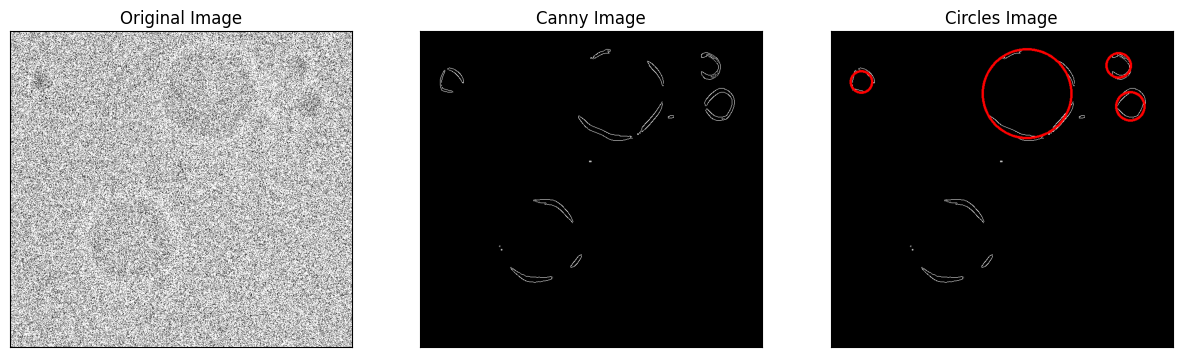

In [68]:
img = edges

threshold_value = 18
ret, img_bin = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

num_circles = 0
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                               param1=75, param2=25,
                               minRadius=1, maxRadius=150)

img_circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        num_circles += 1
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_circles, center, radius, (255, 0, 0), 3)

print('Circles detected: ' + str(num_circles))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Canny Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(img_circles, cmap='gray')
plt.title('Circles Image')
plt.xticks([]), plt.yticks([])
plt.show()

### - with threshold

Circles detected: 19


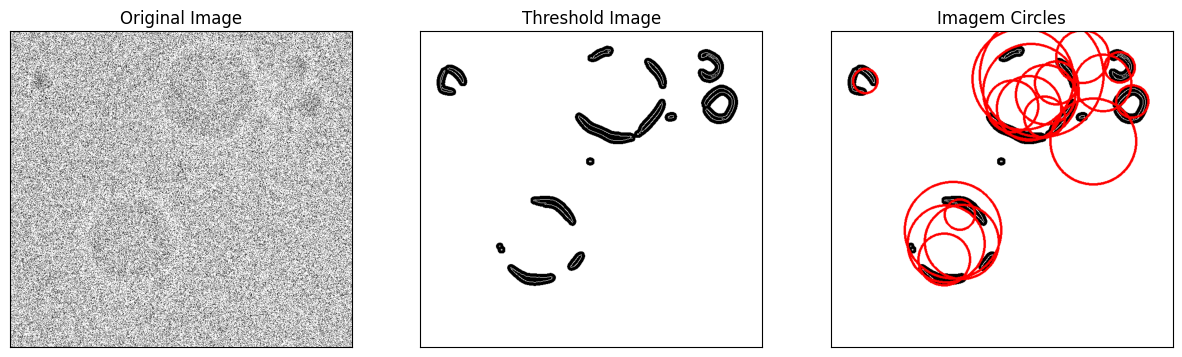

In [63]:
img = Athres

threshold_value = 18
ret, img_bin = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

num_circles = 0
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                               param1=75, param2=25,
                               minRadius=1, maxRadius=150)

img_circles = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        num_circles += 1
        center = (i[0], i[1])
        # circle center
        #cv.circle(img_dst, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img_circles, center, radius, (255, 0, 0), 3)

print('Circles detected: ' + str(num_circles))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('Threshold Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(img_circles, cmap='gray')
plt.title('Imagem Circles')
plt.xticks([]), plt.yticks([])
plt.show()